# Multiple linear Regression

# Step 1: Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('50_Startups.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [4]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


# Encoding Categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [8]:
print(x) #converted column 3 into 3 diffrent columns of 1 and 0

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

# Step 2: splitting Data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
print(x_train)

[[0.0 1.0 0.0 66051.52 182645.56 118148.2]
 [0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 303319.26]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 0.0 27892.92 84710.77 164470.71]
 [0.0 1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 0.0 1315.46 115816.21 297114.46]
 [1.0 0.0 0.0 22177.74 154806.14 28334.72]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 20229.59 65947.93 185265.1]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 44069.95 51283.14 197029.42]
 [1.0 0.0 0.0 38558.51 82982.09 174999.3]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 0.0 135426.92 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 10

In [12]:
print(x_test)

[[0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 77044.01 99281.34 140574.81]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 28663.76 127056.21 201126.82]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]]


In [13]:
print(y_train)

[103282.38 192261.83 122776.86 111313.02 110352.25  96479.51 166187.94
  77798.83 108733.99  49490.75  65200.33 129917.04 118474.03  81229.06
 152211.77  96778.92 155752.6  149759.96  89949.14  81005.76  99937.59
  42559.73 101004.64  64926.08 156991.12  14681.4   35673.41  71498.49
  69758.98 105008.31  97483.56  78239.91 156122.51 107404.34 182901.99
 126992.93 105733.54  96712.8  141585.52 124266.9 ]


In [14]:
print(y_test)

[132602.65 191792.06 146121.95 125370.37 108552.04  97427.84 144259.4
  90708.19 191050.39 134307.35]


# Step 3: training multiple Regression on training set

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# Step 4: predicting test results

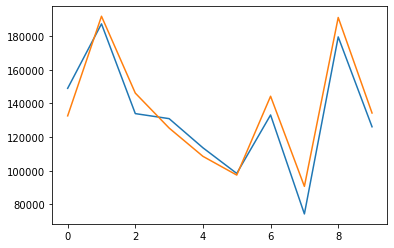

In [23]:
#shows y_pred and y_test data side by side to compare the results
# or show in plot

y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)
#print(np.concatenate(y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
plt.plot(y_pred)
plt.plot(y_test)